<a href="https://colab.research.google.com/github/shardul9320/Face-Generation/blob/main/MDM_Project_StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git /content/stylegan2-ada-pytorch


Cloning into '/content/stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
pip install click requests tqdm pyspng ninja


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 26.6 MB/s eta 0:00:00


In [4]:
import os
print("dnnlib Exists:", os.path.exists("/content/stylegan2-ada-pytorch/dnnlib"))
print("Files inside stylegan2-ada-pytorch:", os.listdir("/content/stylegan2-ada-pytorch"))


dnnlib Exists: True
Files inside stylegan2-ada-pytorch: ['torch_utils', 'calc_metrics.py', 'dnnlib', 'projector.py', '.github', 'docs', 'README.md', 'docker_run.sh', 'Dockerfile', 'generate.py', 'metrics', 'training', 'dataset_tool.py', 'style_mixing.py', '.gitignore', 'legacy.py', '.git', 'LICENSE.txt', 'train.py']


In [7]:
import os
print("File exists:", os.path.exists("/content/stylegan2-ffhq-config-f.pkl"))


File exists: False


In [5]:
import sys
sys.path.append("/content/stylegan2-ada-pytorch")

import importlib
found = importlib.util.find_spec("dnnlib")
print("dnnlib Found:", found is not None)


dnnlib Found: True


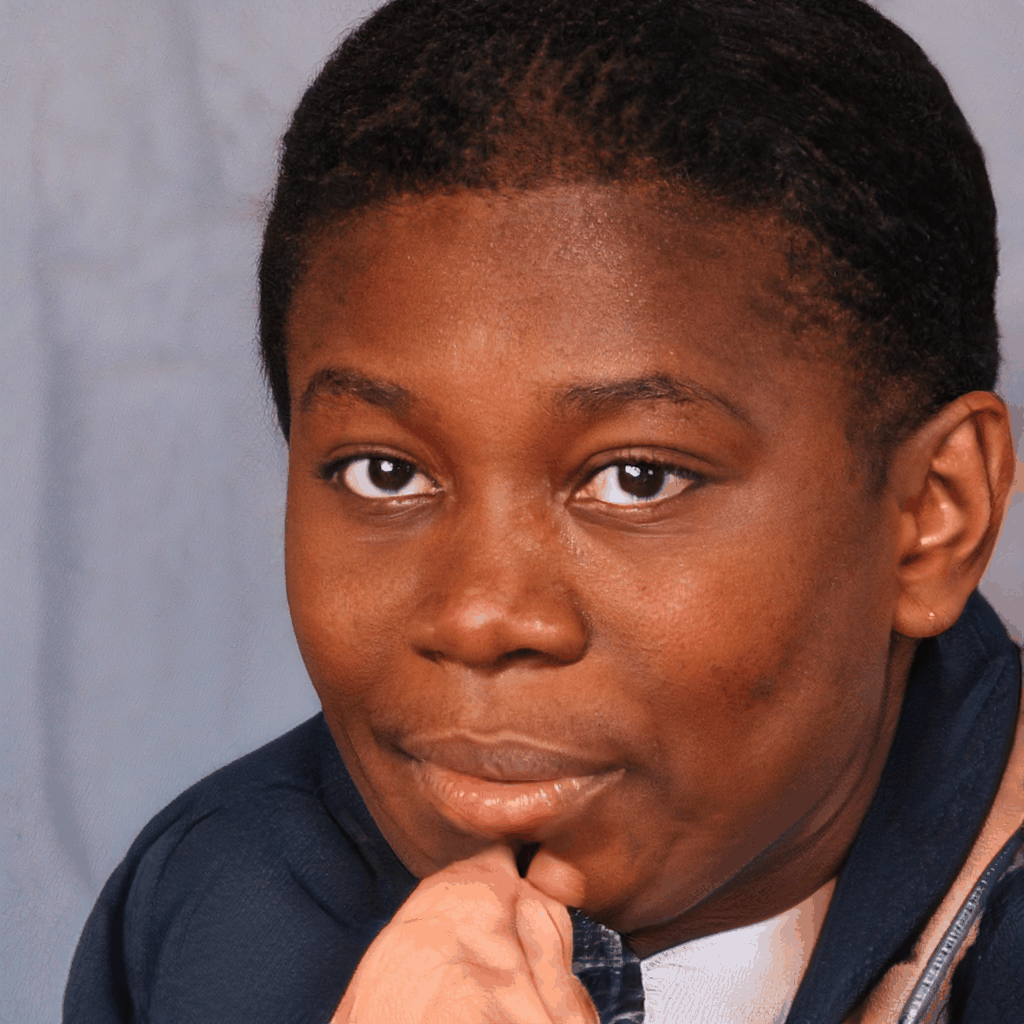

✅ Interpolation GIF saved: /content/interpolation.gif


In [13]:
import torch
import dnnlib
import legacy
import numpy as np
import imageio
from PIL import Image
import os

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load StyleGAN2 model
stylegan_path = "/content/stylegan2-ffhq-config-f.pkl"

# ✅ Load the StyleGAN2 Model
with dnnlib.util.open_url(stylegan_path) as f:
    G = legacy.load_network_pkl(f)["G_ema"].to(device)

# ✅ Generate two random latent vectors
z1 = torch.randn([1, G.z_dim]).to(device)
z2 = torch.randn([1, G.z_dim]).to(device)

# ✅ Create interpolation steps
num_steps = 20  # Smooth transition
interpolated_images = []

for alpha in np.linspace(0, 1, num_steps):
    z_interp = (1 - alpha) * z1 + alpha * z2  # Linear interpolation in latent space
    img = G(z_interp, None, truncation_psi=0.7)  # Generate image
    img = (img * 127.5 + 128).clamp(0, 255).to(torch.uint8)  # Convert to 8-bit format
    img = img.permute(0, 2, 3, 1)[0].cpu().numpy()  # Convert to correct shape
    img_pil = Image.fromarray(img)

    # ✅ Save each frame as PNG
    frame_path = f"/content/frame_{int(alpha*100):03d}.png"
    img_pil.save(frame_path)
    interpolated_images.append(img)

# ✅ Save GIF animation
gif_path = "/content/interpolation.gif"
imageio.mimsave(gif_path, interpolated_images, fps=5)

# ✅ Display the generated GIF
from IPython.display import display
display(Image.open(gif_path))

print(f"✅ Interpolation GIF saved: {gif_path}")


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


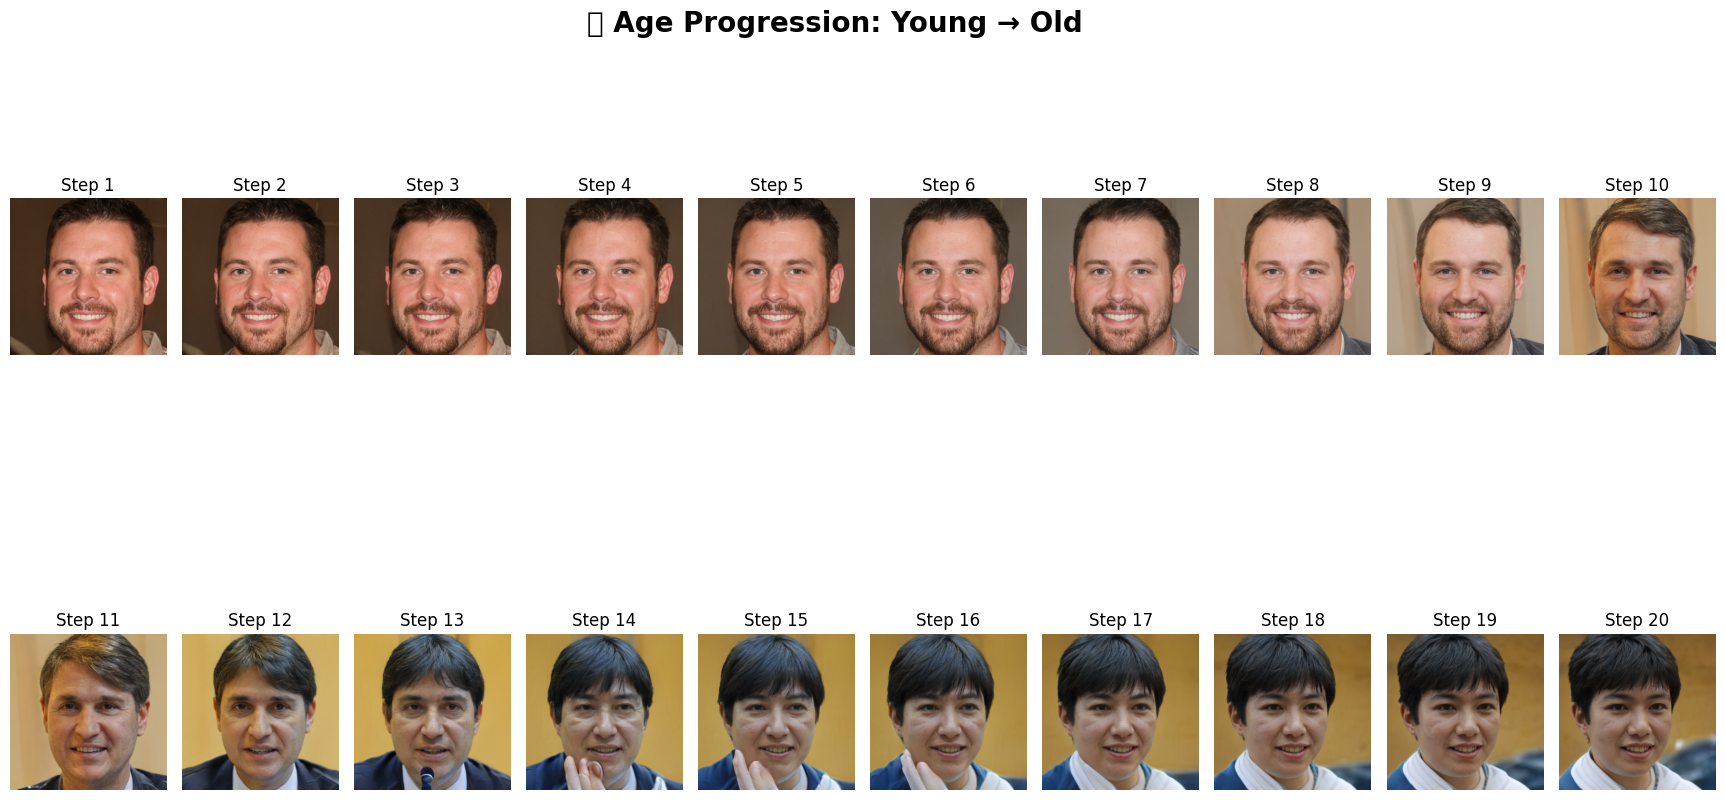

In [16]:
import torch
import dnnlib
import legacy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ✅ Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# ✅ Load the pre-trained StyleGAN2 model
stylegan_path = "/content/stylegan2-ffhq-config-f.pkl"

with dnnlib.util.open_url(stylegan_path) as f:
    G = legacy.load_network_pkl(f)["G_ema"].to(device)

# ✅ Generate a single random face (young)
z = torch.randn([1, G.z_dim]).to(device)

# ✅ Modify the latent code to simulate aging
num_steps = 20  # Increased to 20 for smoother transitions
age_factor = torch.linspace(-3, 3, num_steps).to(device)  # Adjust strength of aging

# ✅ Create a figure with 2 rows for better visibility
fig, axes = plt.subplots(2, num_steps // 2, figsize=(22, 10))  # 2 rows, large size
fig.suptitle("🔹 Age Progression: Young → Old", fontsize=20, fontweight="bold")

for i, alpha in enumerate(age_factor):
    z_modified = z + alpha  # Modify latent vector
    img = G(z_modified, None, truncation_psi=0.7)  # Generate image
    img = (img * 127.5 + 128).clamp(0, 255).to(torch.uint8)  # Convert to correct format
    img = img.permute(0, 2, 3, 1)[0].cpu().numpy()

    # ✅ Arrange images neatly in 2 rows
    row, col = divmod(i, num_steps // 2)
    axes[row, col].imshow(img)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Step {i+1}", fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Adjust spacing for clarity
plt.show()  # Show all images in a grid
